# 1. Análisis de Acciones


In [ ]:
# importar paquetes que se van a usar
!pip install yfinance --upgrade --no-cache-dir
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import yfinance as yf
import xarray as xr
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('display.precision', 3)

pd.reset_option('display.notebook_repr_html')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.width')
pd.reset_option('display.precision')

In [ ]:
# Descargar datos de Yahoo! finance
# Tickers
tickers = ['AA', 'AAPL', 'MSFT', '^GSPC']
# Fuente
data_source = 'yahoo'
# Fechas: desde 01/01/2022 hasta 12/31/2024
start_date = '2022-01-01'
end_date = '2025-12-31'
# Usar yfinance para descargar los datos y ordenarlos
data = yf.download(tickers, start=start_date, end=end_date)
# ordenar los datos
assets = data.sort_index()
#dataframe a xarray para acceder a los datos como panel
dataset = assets.to_xarray()
# Convierte el DataFrame a un xarray.Dataset con las dimensiones correctas
dataset = assets.stack(level=1).to_xarray()
dataset = dataset.to_array(dim='Attributes')

[*********************100%***********************]  4 of 4 completed
<ipython-input-2-c91c3c1f46cc>:16: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  dataset = assets.stack(level=1).to_xarray()


**Nota:** Si se quieren descargar datos de la BMV, se le debe agregar la extensión .MX al ticker

Consideramos 3 activos: Alcoa, Apple y Microsoft. Además del índice S&P500. Todos almacenados en la variable assets, que tiene la siguiente estructura:

In [ ]:
assets

Price           Close                                            High  \
Ticker             AA        AAPL        MSFT        ^GSPC         AA   
Date                                                                    
2022-01-03  58.519508  179.076584  326.287689  4796.560059  60.700902   
2022-01-04  55.775784  176.803818  320.692871  4793.540039  59.285404   
2022-01-05  56.764694  172.100861  308.382111  4700.580078  59.905902   
2022-01-06  56.667751  169.227951  305.945312  4696.049805  57.677010   
2022-01-07  60.468220  169.395203  306.101288  4677.029785  60.972364   
...               ...         ...         ...          ...        ...   
2025-01-02  37.990002  243.850006  418.579987  5868.549805  39.040001   
2025-01-03  35.709999  243.360001  423.350006  5942.470215  37.950001   
2025-01-06  36.490002  245.000000  427.850006  5975.379883  37.075001   
2025-01-07  36.240002  242.210007  422.369995  5909.029785  37.299999   
2025-01-08  36.000000  242.699997  424.559998  5918.250000  36.029999   

Price                                                  Low              \
Ticker            AAPL        MSFT        ^GSPC         AA        AAPL   
Date                                                                     
2022-01-03  179.932572  329.455531  4796.640137  58.257741  174.845898   
2022-01-04  179.991605  326.726395  4818.620117  55.465541  176.233164   
2022-01-05  177.266248  317.827156  4797.700195  56.662896  171.825374   
2022-01-06  172.474769  310.643473  4725.009766  55.504341  168.873752   
2022-01-07  171.333454  308.499092  4707.950195  57.831160  168.273576   
...                ...         ...          ...        ...         ...   
2025-01-02  249.100006  426.070007  5935.089844  37.900002  241.820007   
2025-01-03  244.179993  424.029999  5949.339844  35.375000  241.889999   
2025-01-06  247.330002  434.320007  6021.040039  35.919998  243.199997   
2025-01-07  245.550003  430.649994  6000.680176  35.755001  241.350006   
2025-01-08  243.710007  426.970001  5927.890137  34.750000  240.050003   

Price                                     Open                          \
Ticker            MSFT        ^GSPC         AA        AAPL        MSFT   
Date                                                                     
2022-01-03  321.443327  4758.169922  58.403168  174.963959  326.872527   
2022-01-04  317.875914  4774.270020  58.829735  179.686603  326.365723   
2022-01-05  307.992228  4699.439941  57.152499  176.715276  317.622443   
2022-01-06  303.615716  4671.259766  57.142808  169.916666  305.233756   
2022-01-07  302.251129  4662.740234  58.306217  170.103600  306.208493   
...                ...          ...        ...         ...         ...   
2025-01-02  414.850006  5829.529785  38.165001  248.929993  425.529999   
2025-01-03  419.540009  5888.660156  37.950001  243.360001  421.079987   
2025-01-06  425.480011  5960.009766  36.000000  244.309998  428.000000   
2025-01-07  420.799988  5890.680176  36.889999  242.979996  429.000000   
2025-01-08  421.540009  5874.779785  35.779999  241.919998  423.459991   

Price                     Volume                                   
Ticker            ^GSPC       AA       AAPL      MSFT       ^GSPC  
Date                                                               
2022-01-03  4778.140137  6206700  104487900  28865100  3831020000  
2022-01-04  4804.509766  7980700   99310400  32674300  4683170000  
2022-01-05  4787.990234  7599800   94537600  40054300  4887960000  
2022-01-06  4693.390137  4363100   96904000  39646100  4295280000  
2022-01-07  4697.660156  8071300   86709100  32720000  4181510000  
...                 ...      ...        ...       ...         ...  
2025-01-02  5903.259766  2700400   55740700  16896500  3621680000  
2025-01-03  5891.069824  7491800   40244100  16662900  3667340000  
2025-01-06  5982.810059  5983900   45045600  20573600  4940120000  
2025-01-07  5993.259766  3381500   40856000  18139100  4517330000  
2025-01-08  5910.66

In [ ]:
assets.items

<bound method DataFrame.items of Price           Close                                            High  \
Ticker             AA        AAPL        MSFT        ^GSPC         AA   
Date                                                                    
2022-01-03  58.519508  179.076584  326.287689  4796.560059  60.700902   
2022-01-04  55.775784  176.803818  320.692871  4793.540039  59.285404   
2022-01-05  56.764694  172.100861  308.382111  4700.580078  59.905902   
2022-01-06  56.667751  169.227951  305.945312  4696.049805  57.677010   
2022-01-07  60.468220  169.395203  306.101288  4677.029785  60.972364   
...               ...         ...         ...          ...        ...   
2025-01-02  37.990002  243.850006  418.579987  5868.549805  39.040001   
2025-01-03  35.709999  243.360001  423.350006  5942.470215  37.950001   
2025-01-06  36.490002  245.000000  427.850006  5975.379883  37.075001   
2025-01-07  36.240002  242.210007  422.369995  5909.029785  37.299999   
2025-01-08  36.000000  242.699997  424.559998  5918.250000  36.029999   

Price                                                  Low              \
Ticker            AAPL        MSFT        ^GSPC         AA        AAPL   
Date                                                                     
2022-01-03  179.932572  329.455531  4796.640137  58.257741  174.845898   
2022-01-04  179.991605  326.726395  4818.620117  55.465541  176.233164   
2022-01-05  177.266248  317.827156  4797.700195  56.662896  171.825374   
2022-01-06  172.474769  310.643473  4725.009766  55.504341  168.873752   
2022-01-07  171.333454  308.499092  4707.950195  57.831160  168.273576   
...                ...         ...          ...        ...         ...   
2025-01-02  249.100006  426.070007  5935.089844  37.900002  241.820007   
2025-01-03  244.179993  424.029999  5949.339844  35.375000  241.889999   
2025-01-06  247.330002  434.320007  6021.040039  35.919998  243.199997   
2025-01-07  245.550003  430.649994  6000.680176  35.755001  241.350006   
2025-01-08  243.710007  426.970001  5927.890137  34.750000  240.050003   

Price                                     Open                          \
Ticker            MSFT        ^GSPC         AA        AAPL        MSFT   
Date                                                                     
2022-01-03  321.443327  4758.169922  58.403168  174.963959  326.872527   
2022-01-04  317.875914  4774.270020  58.829735  179.686603  326.365723   
2022-01-05  307.992228  4699.439941  57.152499  176.715276  317.622443   
2022-01-06  303.615716  4671.259766  57.142808  169.916666  305.233756   
2022-01-07  302.251129  4662.740234  58.306217  170.103600  306.208493   
...                ...          ...        ...         ...         ...   
2025-01-02  414.850006  5829.529785  38.165001  248.929993  425.529999   
2025-01-03  419.540009  5888.660156  37.950001  243.360001  421.079987   
2025-01-06  425.480011  5960.009766  36.000000  244.309998  428.000000   
2025-01-07  420.799988  5890.680176  36.889999  242.979996  429.000000   
2025-01-08  421.540009  5874.779785  35.779999  241.919998  423.459991   

Price                     Volume                                   
Ticker            ^GSPC       AA       AAPL      MSFT       ^GSPC  
Date                                                               
2022-01-03  4778.140137  6206700  104487900  28865100  3831020000  
2022-01-04  4804.509766  7980700   99310400  32674300  4683170000  
2022-01-05  4787.990234  7599800   94537600  40054300  4887960000  
2022-01-06  4693.390137  4363100   96904000  39646100  4295280000  
2022-01-07  4697.660156  8071300   86709100  32720000  4181510000  
...                 ...      ...        ...       ...         ...  
2025-01-02  5903.259766  2700400   55740700  16896500  3621680000  
2025-01-03  5891.069824  7491800   40244100  16662900  3667340000  
2025-01-06  5982.810059  5983900   45045600  20573600  4940120000  
2025-01-07  5993.259766  3381500   40856000  18139100 

In [ ]:
# Visualizar la variable High de MSFT
assets['High']['MSFT']

,MSFT
Date,
2022-01-03,329.455531
2022-01-04,326.726395
2022-01-05,317.827156
2022-01-06,310.643473
2022-01-07,308.499092
...,...
2025-01-02,426.070007
2025-01-03,424.029999
2025-01-06,434.320007


In [ ]:
assets['Low']['MSFT']

,MSFT
Date,
2022-01-03,321.443327
2022-01-04,317.875914
2022-01-05,307.992228
2022-01-06,303.615716
2022-01-07,302.251129
...,...
2025-01-02,414.850006
2025-01-03,419.540009
2025-01-06,425.480011


In [ ]:
# Visualizar los precios de cierre en una fecha en especifico
assets.loc['2022-01-14', 'Close']

,2022-01-14
Ticker,
AA,59.518105
AAPL,170.280670
MSFT,302.358368
^GSPC,4662.850098


In [ ]:
# Visualizar todos los precios de una misma empresa
assets.loc[:, (slice(None), '^GSPC')]

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2022-01-03,4796.560059,4796.640137,4758.169922,4778.140137,3831020000
2022-01-04,4793.540039,4818.620117,4774.270020,4804.509766,4683170000
2022-01-05,4700.580078,4797.700195,4699.439941,4787.990234,4887960000
2022-01-06,4696.049805,4725.009766,4671.259766,4693.390137,4295280000
2022-01-07,4677.029785,4707.950195,4662.740234,4697.660156,4181510000
...,...,...,...,...,...
2025-01-02,5868.549805,5935.089844,5829.529785,5903.259766,3621680000
2025-01-03,5942.470215,5949.339844,5888.660156,5891.069824,3667340000


In [ ]:
# Visualizar dos variables para una empresa
assets.loc[:, (['High', 'Low'], '^GSPC')]

Price,High,Low
Ticker,^GSPC,^GSPC
Date,,
2022-01-03,4796.640137,4758.169922
2022-01-04,4818.620117,4774.270020
2022-01-05,4797.700195,4699.439941
2022-01-06,4725.009766,4671.259766
2022-01-07,4707.950195,4662.740234
...,...,...
2025-01-02,5935.089844,5829.529785
2025-01-03,5949.339844,5888.660156


# Gráficos de las series de datos

En primer lugar, se toma como ejemplo la serie de precios de cierre de Microsoft, así como el volumen de transacciones

In [ ]:
msftC=assets['Close']['MSFT']
msftV=assets['Volume']['MSFT']
msftC

,MSFT
Date,
2022-01-03,326.287689
2022-01-04,320.692871
2022-01-05,308.382111
2022-01-06,305.945312
2022-01-07,306.101288
...,...
2025-01-02,418.579987
2025-01-03,423.350006
2025-01-06,427.850006


<Axes: xlabel='Date'>

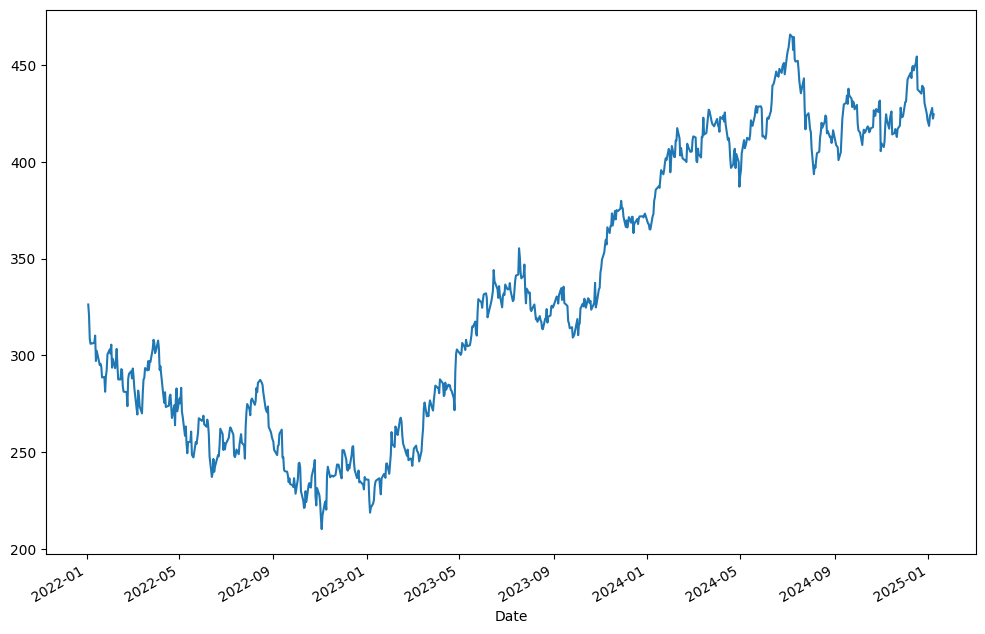

In [ ]:
# Graficamos para el precio de cierre
msftC.plot(figsize=(12,8))

<Axes: xlabel='Date'>

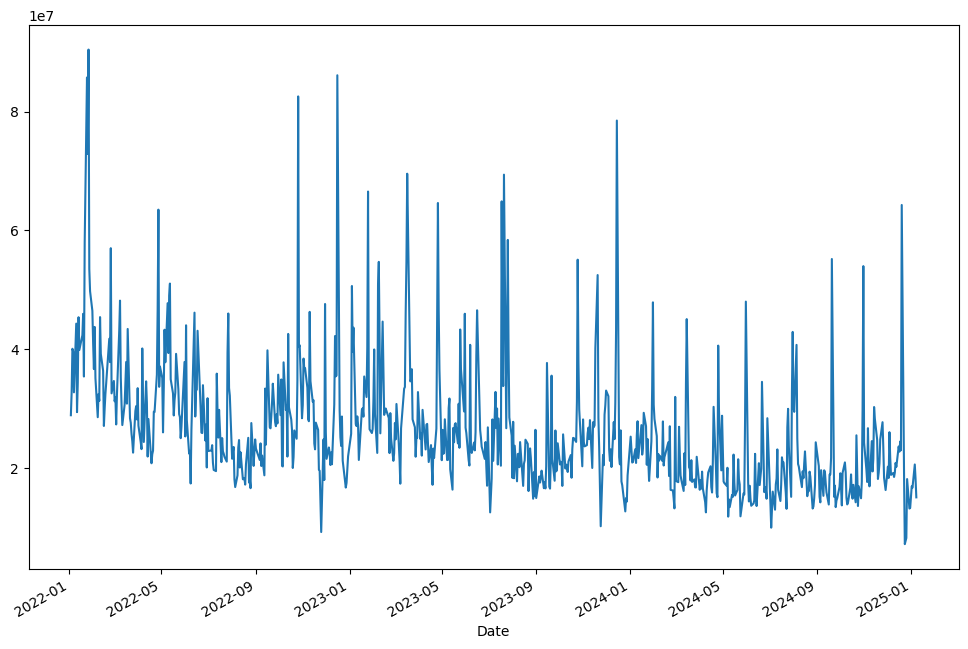

In [ ]:
# Graficamos para el volumen de las transacciones
msftV.plot(figsize=(12,8))

Este procedimiento puede aplicarse sobre todas las series de datos. En primer lugar, haremos los precios del cierre

In [ ]:
allC=assets['Close']
allC

Ticker,AA,AAPL,MSFT,^GSPC
Date,,,,
2022-01-03,58.519508,179.076584,326.287689,4796.560059
2022-01-04,55.775784,176.803818,320.692871,4793.540039
2022-01-05,56.764694,172.100861,308.382111,4700.580078
2022-01-06,56.667751,169.227951,305.945312,4696.049805
2022-01-07,60.468220,169.395203,306.101288,4677.029785
...,...,...,...,...
2025-01-02,37.990002,243.850006,418.579987,5868.549805
2025-01-03,35.709999,243.360001,423.350006,5942.470215
2025-01-06,36.490002,245.000000,427.850006,5975.379883


<Axes: xlabel='Date'>

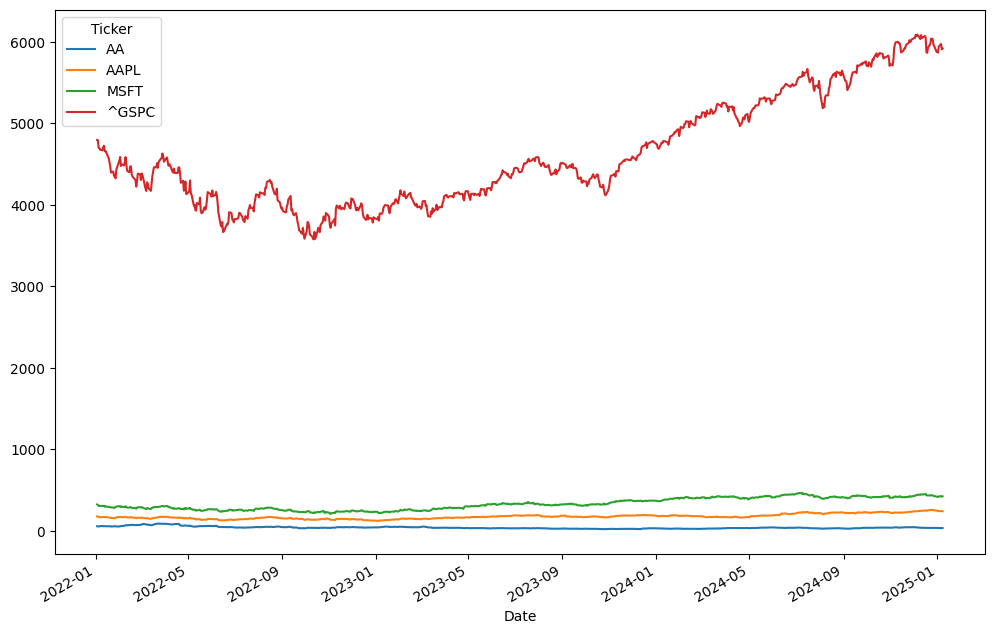

In [ ]:
# Graficamos
allC.plot(figsize=(12,8))

En el gráfico anterior, es difícil observar el comportamiento de las acciones debido a su diferencia de magnitud con respecto al S&P500. Por esto, se seleccionan unicamente las series de tiempo de los precios de las acciones.

In [ ]:
allassetsC=assets['Close'][['AA', 'AAPL', 'MSFT']]

<Axes: xlabel='Date'>

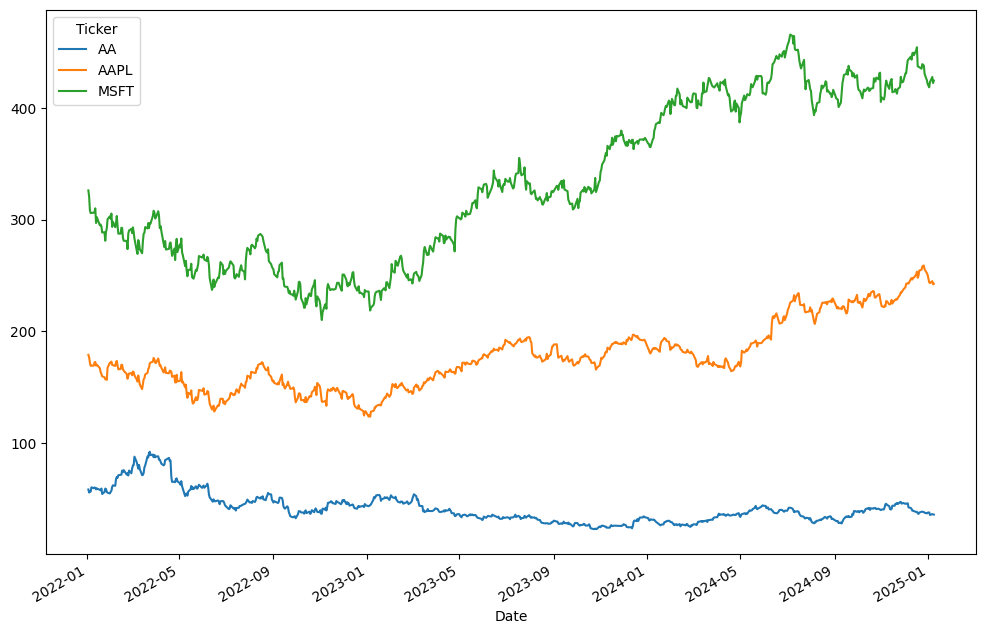

In [ ]:
# Graficamos
allassetsC.plot(figsize=(12,8))

Usualmente, es conveniente graficar el precio de cierre de una aciion con su volumen de transacciones. El siguiente es un ejemplo de estas graficas para el caso de Microsoft

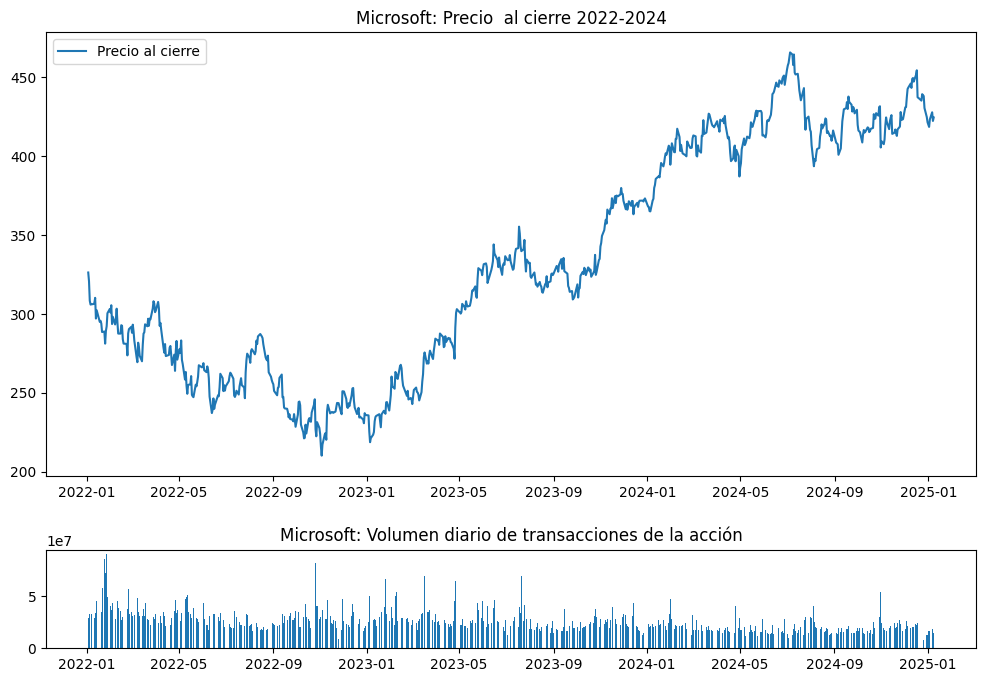

In [ ]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(msftC.index, msftC, label='Precio al cierre')
plt.title('Microsoft: Precio  al cierre 2022-2024')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
plt.title('Microsoft: Volumen diario de transacciones de la acción')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

Otro procedimiento que se efectúa con frecuencia es el cálculo de promedios y desviaciones móviles para la serie de precios. Los promedios móviles se calculan mediante:

In [ ]:
short_rollmean_msft = msftC.rolling(window=20).mean()
long_rollmean_msft = msftC.rolling(window=100).mean()

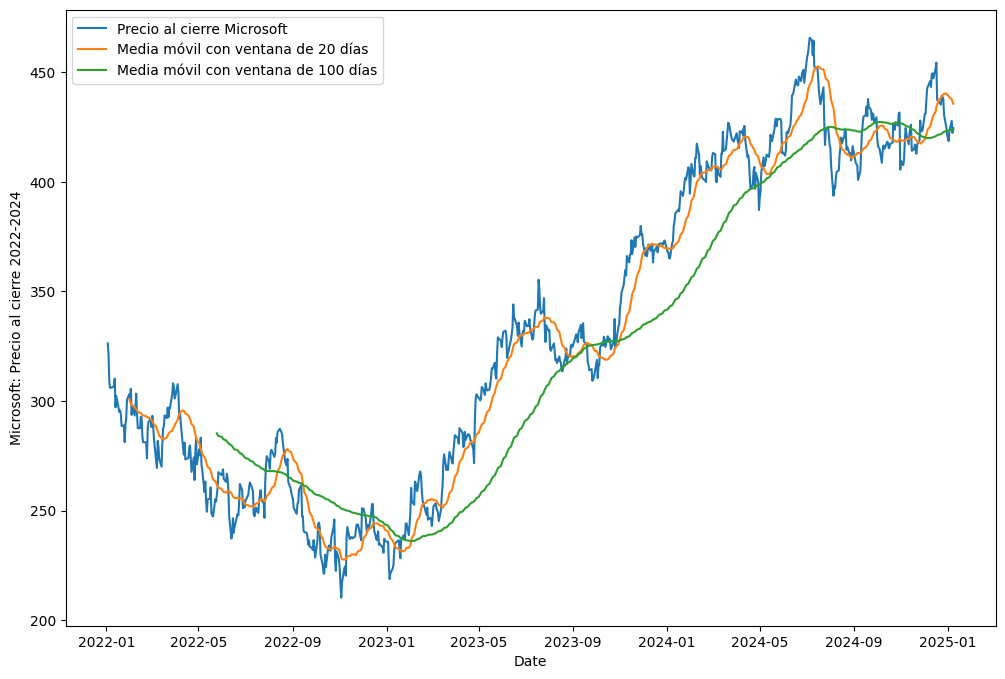

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msftC.index, msftC, label='Precio al cierre Microsoft')
ax.plot(short_rollmean_msft.index, short_rollmean_msft, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_msft.index, long_rollmean_msft, label='Media móvil con ventana de 100 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Precio al cierre 2022-2024')
ax.legend()

In [ ]:
short_rollstd_msft = msftC.rolling(window=20).std()
long_rollstd_msft = msftC.rolling(window=100).std()

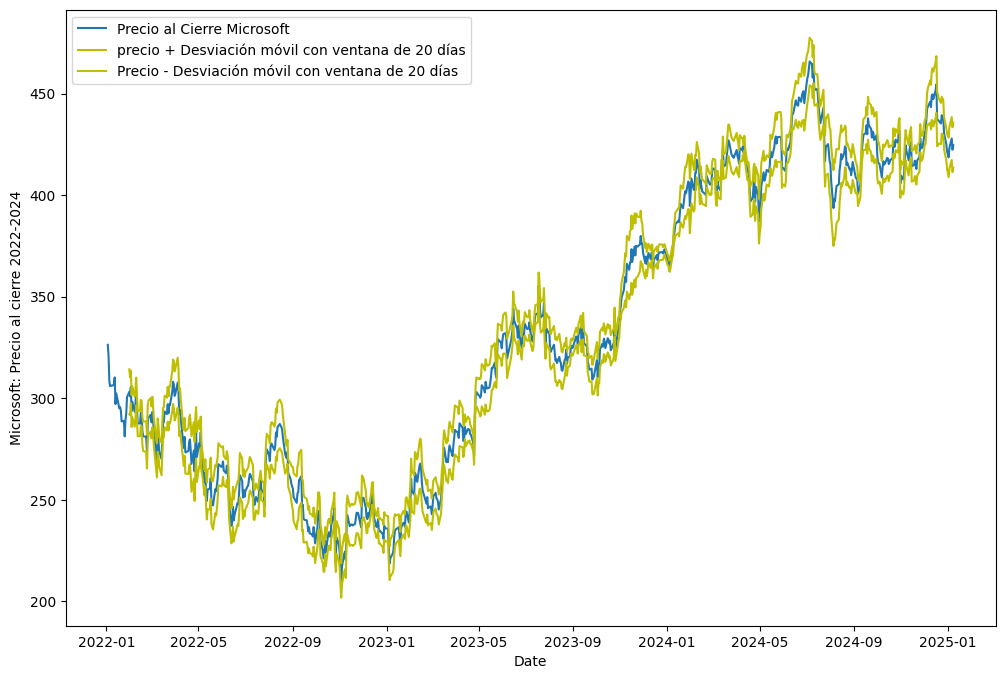

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msftC.index, msftC, label='Precio al Cierre Microsoft')
ax.plot(short_rollstd_msft.index, msftC+short_rollstd_msft, color="y", label='precio + Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_msft.index, msftC-short_rollstd_msft, color="y", label='Precio - Desviación móvil con ventana de 20 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Precio al cierre 2022-2024')
ax.legend()

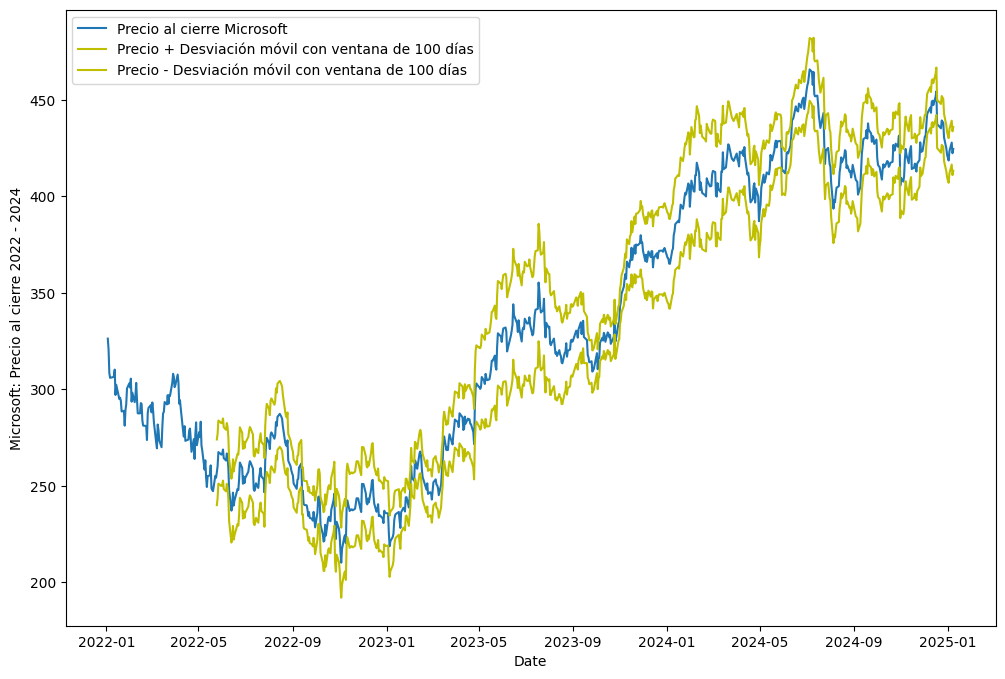

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msftC.index, msftC, label='Precio al cierre Microsoft')
ax.plot(long_rollstd_msft.index, msftC+long_rollstd_msft, color="y", label='Precio + Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_msft.index, msftC-long_rollstd_msft, color="y", label='Precio - Desviación móvil con ventana de 100 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Precio al cierre 2022 - 2024')
ax.legend()

# 3. Cáculo de Rendimientos

Para una sucesión de precios $\{S_t\}^n_{t=0}$, el rendimiento simple $R_t$ se define como el cambio porcentual

$R_t = \frac{S_t - S_{t-1}}{S_{t-1}}$

para $t = 1, ..., n.$

Para nuestro caso, la fórmula anterior se puede implementar para todos los precios de manera simultánea mediante:

In [ ]:
R = ((allC - allC.shift(1))/allC)[1:]
R

Ticker,AA,AAPL,MSFT,^GSPC
Date,,,,
2022-01-04,-0.049192,-0.012855,-0.017446,-0.000630
2022-01-05,0.017421,-0.027327,-0.039920,-0.019776
2022-01-06,-0.001711,-0.016977,-0.007965,-0.000965
2022-01-07,0.062851,0.000987,0.000510,-0.004067
2022-01-10,-0.013487,0.000116,0.000732,-0.001443
...,...,...,...,...
2025-01-02,0.005528,-0.026943,-0.006976,-0.002229
2025-01-03,-0.063848,-0.002014,0.011267,0.012439
2025-01-06,0.021376,0.006694,0.010518,0.005508


Otra manera de calcular el rendimiento simple es usando el comando del cambio porcentual

In [ ]:
(allC.pct_change())[1:]

Ticker,AA,AAPL,MSFT,^GSPC
Date,,,,
2022-01-04,-0.046886,-0.012692,-0.017147,-0.000630
2022-01-05,0.017730,-0.026600,-0.038388,-0.019393
2022-01-06,-0.001708,-0.016693,-0.007902,-0.000964
2022-01-07,0.067066,0.000988,0.000510,-0.004050
2022-01-10,-0.013308,0.000116,0.000732,-0.001441
...,...,...,...,...
2025-01-02,0.005559,-0.026236,-0.006928,-0.002224
2025-01-03,-0.060016,-0.002009,0.011396,0.012596
2025-01-06,0.021843,0.006739,0.010630,0.005538


una gráfica de los rendimientos se obtiene:

<Axes: xlabel='Date'>

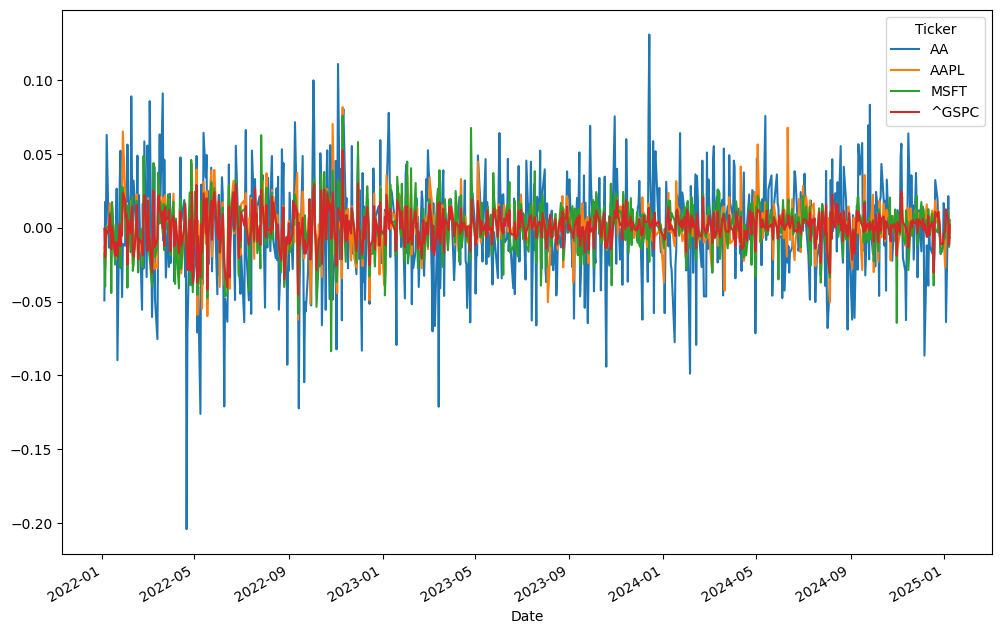

In [ ]:
R.plot(figsize=(12,8))

*Nota: dado que se observa una tendencia constante en el rendimiento, se puede plantear la hiótesis de que se puede modelar usando un proceso estocástico estacionario en media*

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logarítmico. Éste, está definido como

$r_t = ln(1 + R_t)$

donde $R_t$ es el rendimiento simple. Es fácil darse cuenta que $r_t = ln(\frac{S_t}{S_{t-1}})$

Para este caso, la fórmula del rendimiento continuamente compuesto se translada fácilmente a Python

In [ ]:
r=np.log(1+R)
r

Ticker,AA,AAPL,MSFT,^GSPC
Date,,,,
2022-01-04,-0.050443,-0.012938,-0.017600,-0.000630
2022-01-05,0.017271,-0.027707,-0.040739,-0.019974
2022-01-06,-0.001712,-0.017122,-0.007997,-0.000965
2022-01-07,0.060955,0.000987,0.000509,-0.004075
2022-01-10,-0.013579,0.000116,0.000731,-0.001444
...,...,...,...,...
2025-01-02,0.005513,-0.027312,-0.007000,-0.002231
2025-01-03,-0.065977,-0.002016,0.011204,0.012363
2025-01-06,0.021151,0.006672,0.010463,0.005492


<Axes: xlabel='Date'>

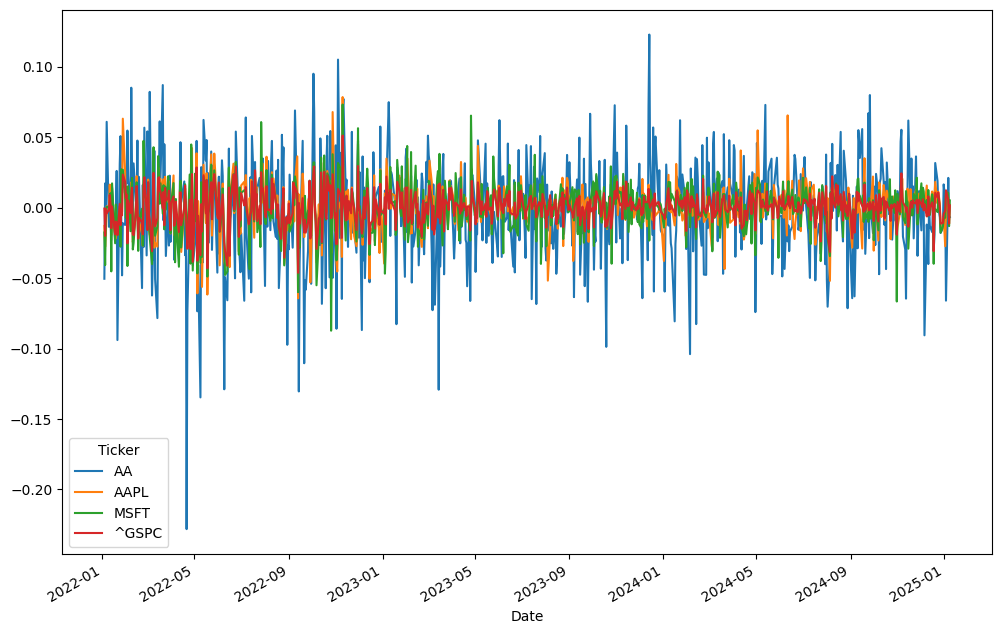

In [ ]:
# Graficando los rendimientos
r.plot(figsize=(12,8))

In [ ]:
R.describe()

Ticker,AA,AAPL,MSFT,^GSPC
count,757.000000,757.000000,757.000000,757.000000
mean,-0.001267,0.000257,0.000198,0.000217
std,0.035509,0.017002,0.017348,0.011027
min,-0.204017,-0.062338,-0.083607,-0.045190
25%,-0.022101,-0.008528,-0.008587,-0.005814
50%,-0.000520,0.001093,0.000846,0.000251
75%,0.021184,0.009531,0.010518,0.006679
max,0.130769,0.081705,0.076014,0.052523


In [ ]:
r.describe()

Ticker,AA,AAPL,MSFT,^GSPC
count,757.000000,757.000000,757.000000,757.000000
mean,-0.001907,0.000113,0.000047,0.000156
std,0.035879,0.017009,0.017385,0.011044
min,-0.228177,-0.064365,-0.087310,-0.046243
25%,-0.022349,-0.008565,-0.008624,-0.005831
50%,-0.000520,0.001093,0.000845,0.000251
75%,0.020963,0.009486,0.010463,0.006656
max,0.122898,0.078538,0.073264,0.051190


In [ ]:
Rmsft=(msftC.pct_change())[1:]
Rmsft

,MSFT
Date,
2022-01-04,-0.017147
2022-01-05,-0.038388
2022-01-06,-0.007902
2022-01-07,0.000510
2022-01-10,0.000732
...,...
2025-01-02,-0.006928
2025-01-03,0.011396
2025-01-06,0.010630


In [ ]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

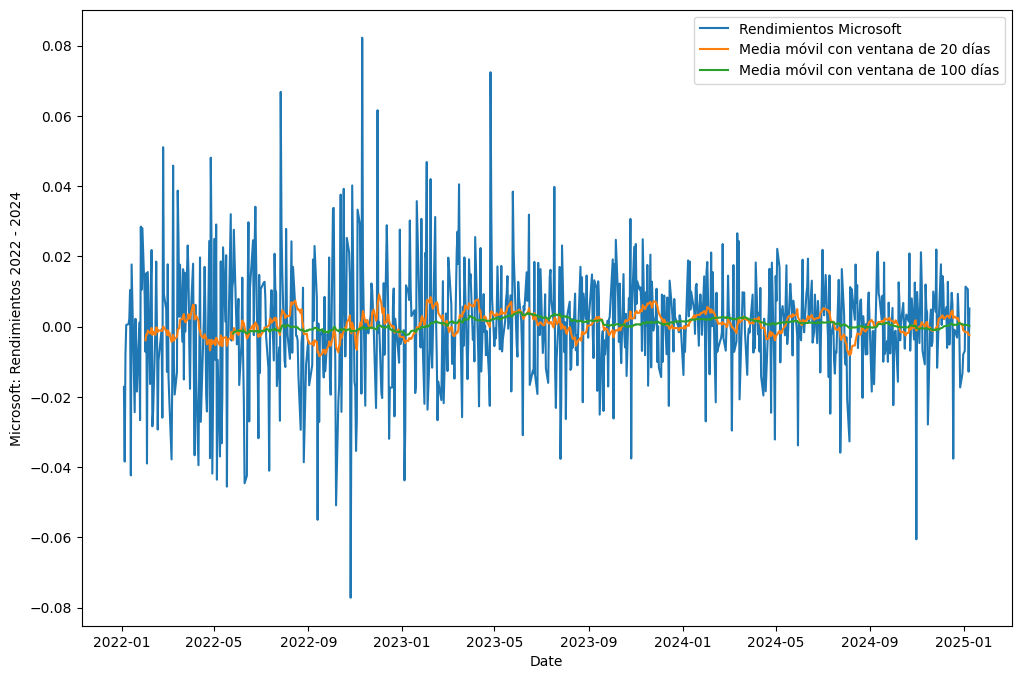

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label='Rendimientos Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label='Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, label='Media móvil con ventana de 100 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Rendimientos 2022 - 2024')
ax.legend()

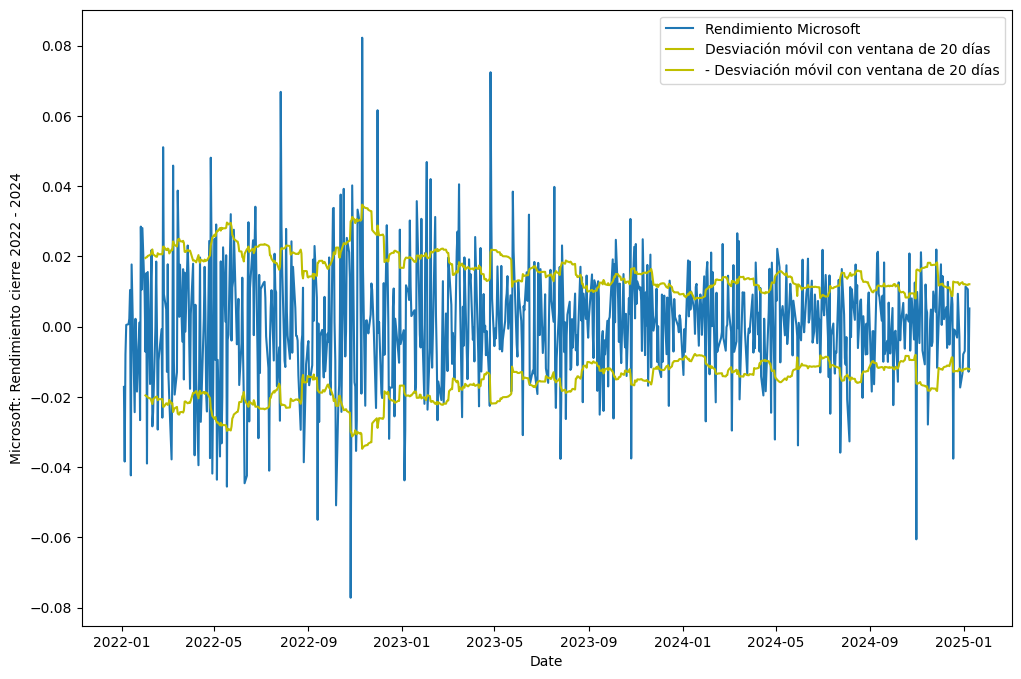

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label='Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, color="y", label='Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, color="y", label='- Desviación móvil con ventana de 20 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Rendimiento cierre 2022 - 2024')
ax.legend()

<Axes: xlabel='Date'>

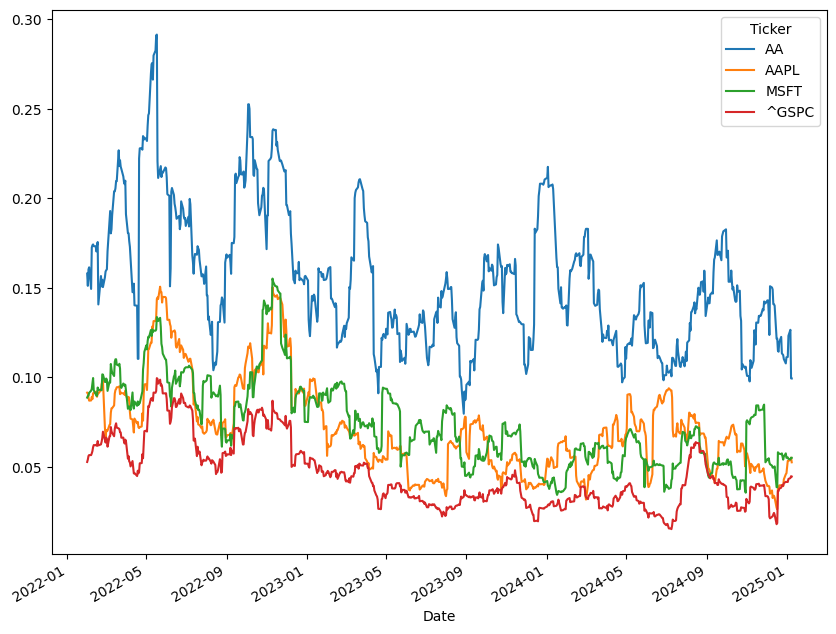

In [ ]:
min_periods = 20
vol = R.rolling(window=min_periods).std()*np.sqrt(min_periods)
vol.plot(figsize=(10,8))

<Axes: xlabel='Date'>

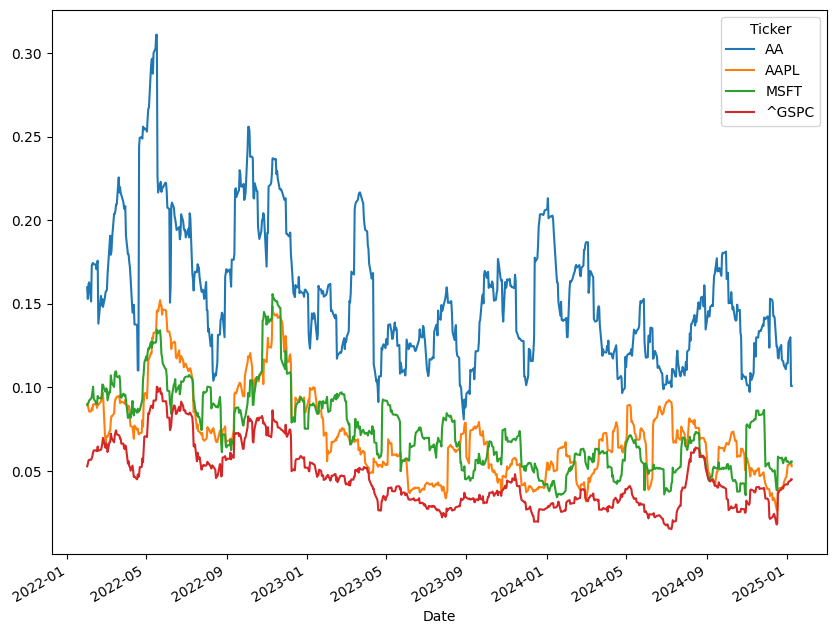

In [ ]:
min_periods = 20
vol = r.rolling(window=min_periods).std()*np.sqrt(min_periods)
vol.plot(figsize=(10, 8))

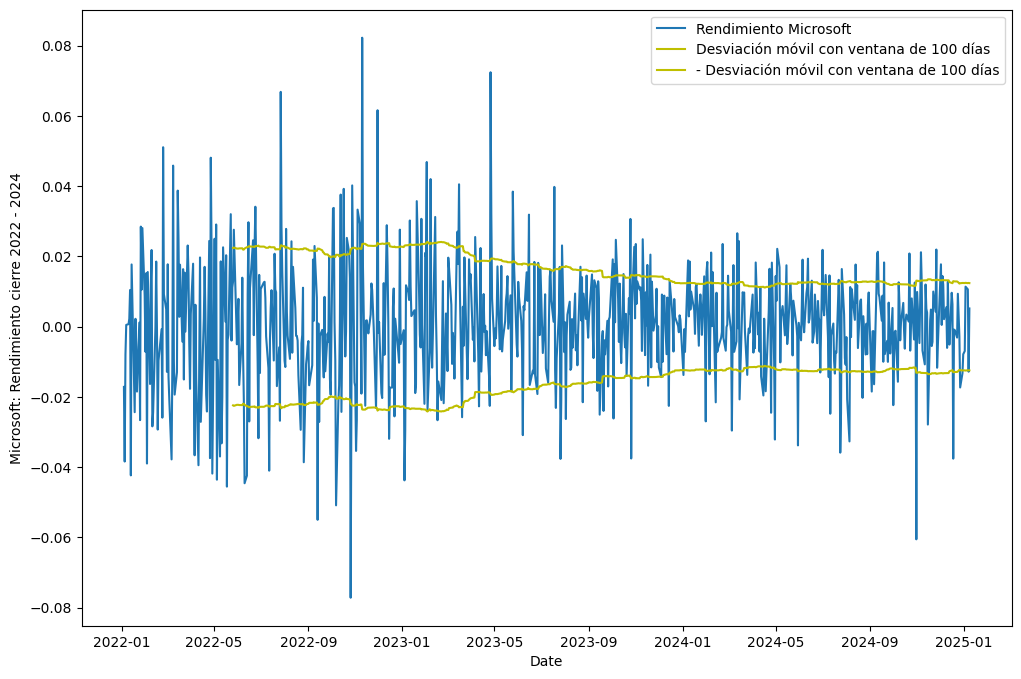

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label='Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, color="y", label='Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, color="y", label='- Desviación móvil con ventana de 100 días')
plt.gcf().set_size_inches(12,8)
ax.set_xlabel('Date')
ax.set_ylabel('Microsoft: Rendimiento cierre 2022 - 2024')
ax.legend()

**Rendimiento acumulado**

In [ ]:
Rcum = (1 + R).cumprod()
Rcum

Ticker,AA,AAPL,MSFT,^GSPC
Date,,,,
2022-01-04,0.950808,0.987145,0.982554,0.999370
2022-01-05,0.967372,0.960170,0.943330,0.979606
2022-01-06,0.965717,0.943869,0.935816,0.978661
2022-01-07,1.026413,0.944801,0.936293,0.974681
2022-01-10,1.012570,0.944911,0.936978,0.973275
...,...,...,...,...
2025-01-02,0.250370,1.094361,1.022036,1.116323
2025-01-03,0.234385,1.092157,1.033551,1.130209
2025-01-06,0.239395,1.099468,1.044422,1.136434


<Axes: xlabel='Date'>

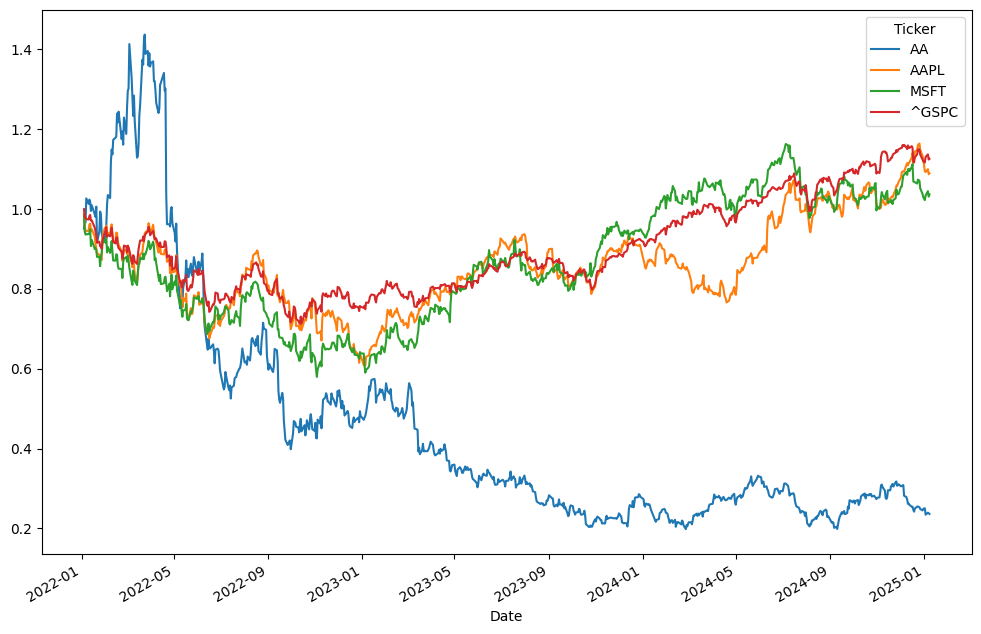

In [ ]:
Rcum.plot(figsize=(12,8))

In [ ]:
rcum=np.exp(r.cumsum())
rcum

Ticker,AA,AAPL,MSFT,^GSPC
Date,,,,
2022-01-04,0.950808,0.987145,0.982554,0.999370
2022-01-05,0.967372,0.960170,0.943330,0.979606
2022-01-06,0.965717,0.943869,0.935816,0.978661
2022-01-07,1.026413,0.944801,0.936293,0.974681
2022-01-10,1.012570,0.944911,0.936978,0.973275
...,...,...,...,...
2025-01-02,0.250370,1.094361,1.022036,1.116323
2025-01-03,0.234385,1.092157,1.033551,1.130209
2025-01-06,0.239395,1.099468,1.044422,1.136434


<Axes: xlabel='Date'>

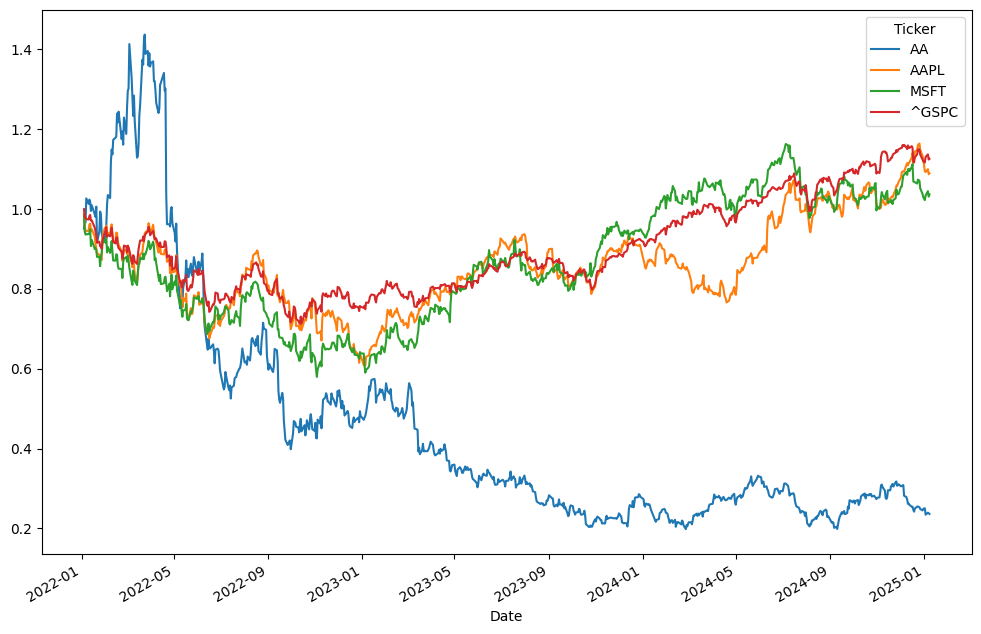

In [ ]:
rcum.plot(figsize=(12,8))

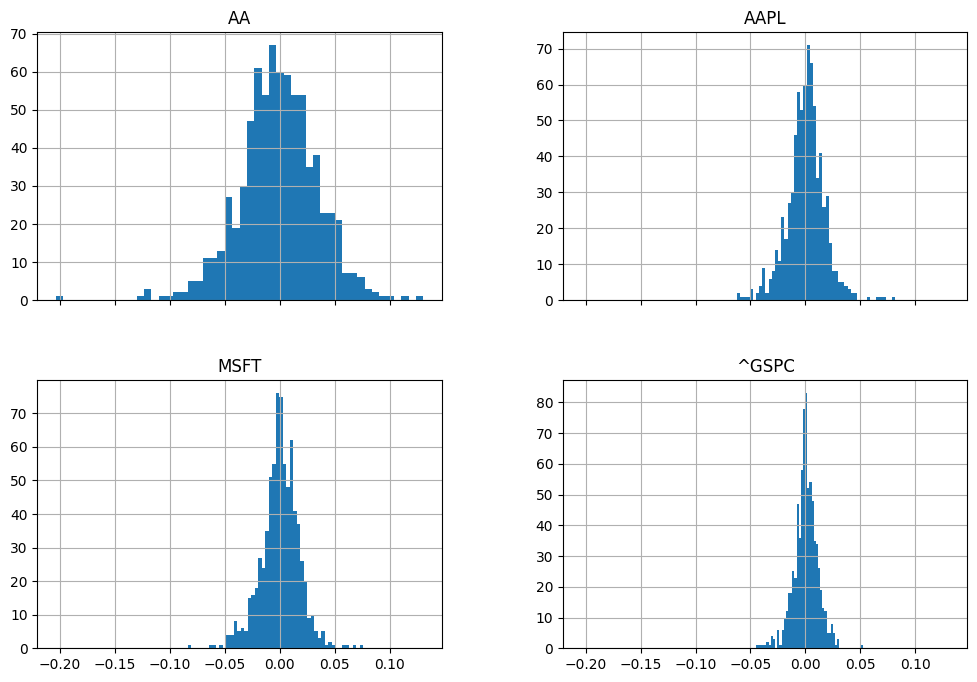

In [ ]:
R.hist(bins=50, sharex=True, figsize=(12,8));

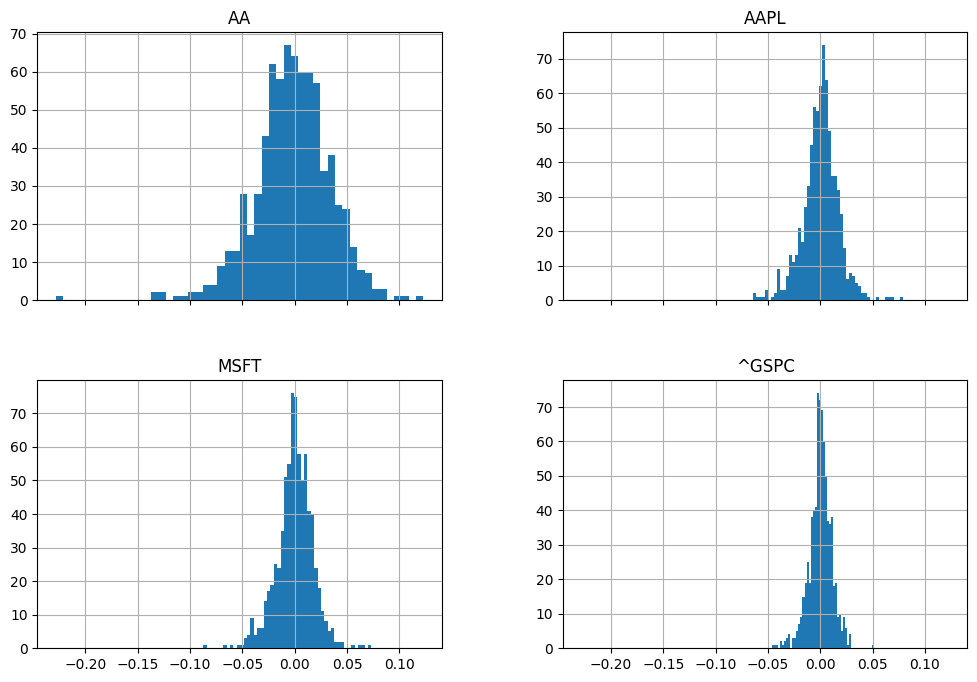

In [ ]:
r.hist(bins=50, sharex=True, figsize=(12,8));

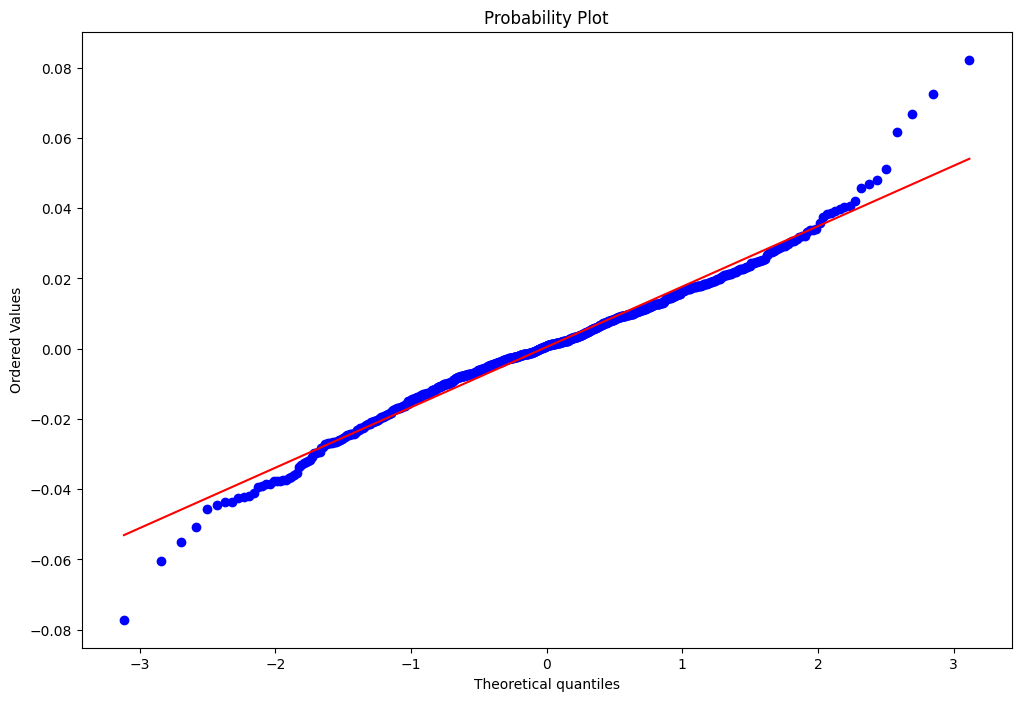

In [ ]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(Rmsft, dist='norm', plot=ax)
plt.show();

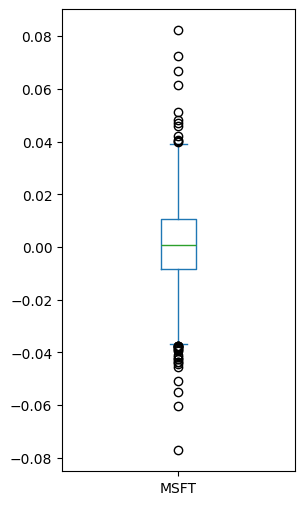

In [ ]:
Rmsft.plot(kind='box', figsize=(3,6));

## Interpretación de este tipo de gráficos:

**Elementos clave:**

1- **La Caja:**


*   La linea dentro de la caja representa la *mediana* de los rendimientos. Esto significa que la mitad de los días hubo rendimientos por encima de este valor, y la otra mitad por debajo.
*   La distancia entre el primer y tercer cuartil (borde inferior y superior, respectivamente) contiene el 50% central de los rendimientos diarios. Esta gráfica nos da una idea de la dispersión típica de los datos.

2- **Los bigotes:**


*   Las lineas que se extienden desde la caja (bigotes) muestran la extensión de los datos, excluyendo los valores atípicos (outliers)
*   Los valores de la extensión de ambos bigotes no se consideran atípicos.

3- **Los valores atípicos (outliers):**


*   Los puntos individuales fuera de los bigotes se consideran valores atípicos en los rendimientos, causados por noticias o valores importantes que alteraron el precio de manera significativa.

Por último:

* Si la caja está ubicada cerca del cero y tiene bigotes cortos, significa que hay poca variabilidad en los rendimientos
* Si la caja se encuentra por encima del cero, sus rendimientos suelen ser positivos y viceversa.
* Una caja larga indica una mayor variabilidad en los rendimientos diarios
* La presencia de muchos valores atípicos pueden indicar que la empresa es suceptible a eventos o noticias que puedan generar movimientos en los precios más extremos.









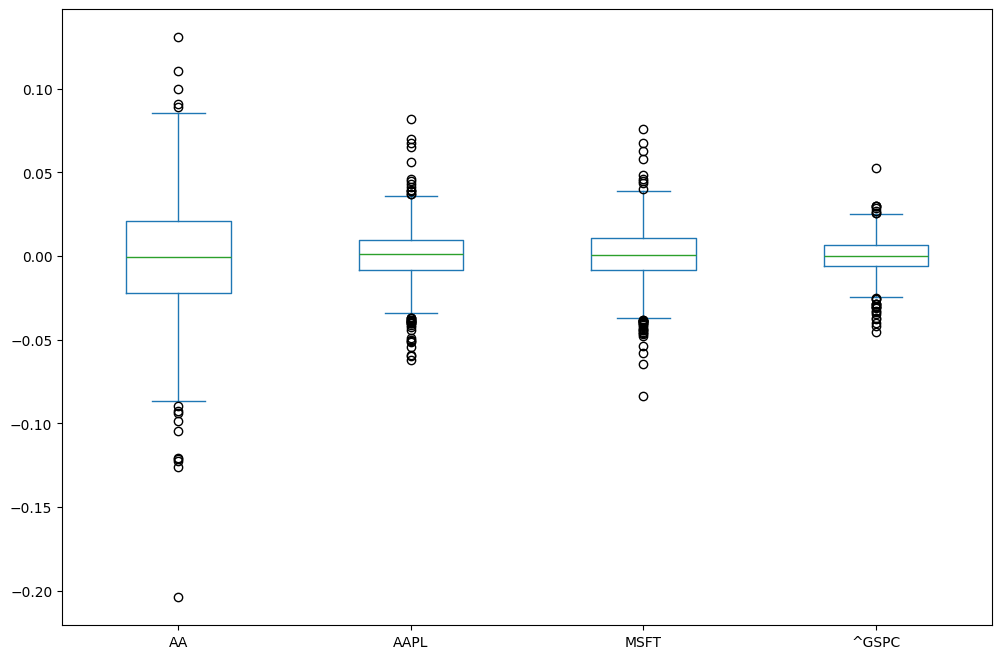

In [ ]:
R.plot(kind='box', figsize=(12,8));

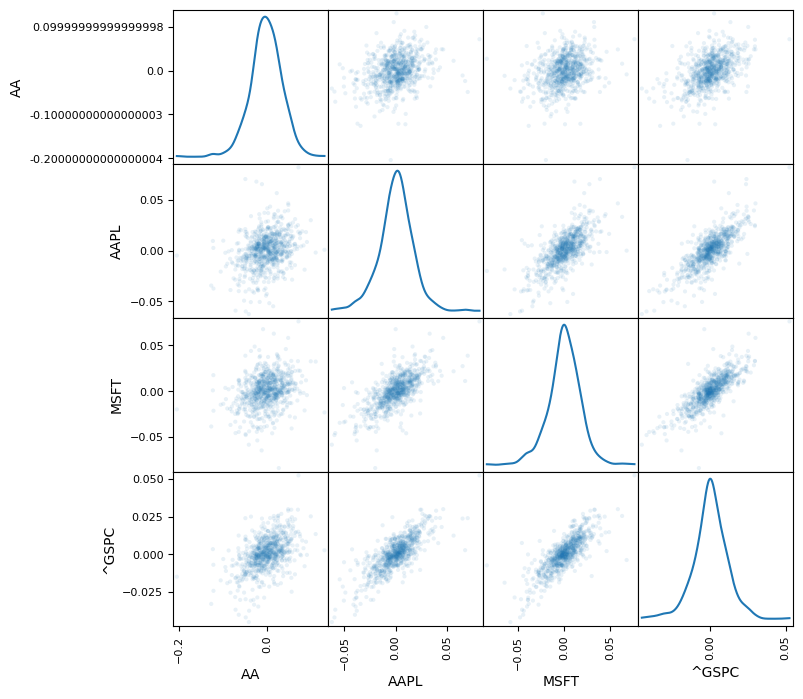

In [ ]:
pd.plotting.scatter_matrix(R, diagonal='kde', alpha=0.1, figsize=(8,8));

Esta línea de código crea una visualización que permite analizar las relaciones entre los rendimientos de los diferentes activos. Los gráficos de dispersión fuera de la diagonal muestran cómo se mueven los rendimientos de dos activos en relación entre sí, mientras que los gráficos de densidad de kernel en la diagonal muestran la distribución de los rendimientos de cada activo individual.

Por ejemplo, podrías observar si los rendimientos de Apple y Microsoft tienden a moverse en la misma dirección (correlación positiva) o en direcciones opuestas (correlación negativa) a través del gráfico de dispersión correspondiente en la matriz. Y con los gráficos de densidad podrías ver si los rendimientos de un activo en particular se distribuyen de forma normal o tienen sesgos.

